# Validation: CM Prior sensitivity

This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Tests the effect of different CM priors on the CM effectiveness

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import scipy
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor
import sensitivityplotlib as spl

sns.set_style("ticks")
%matplotlib inline

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


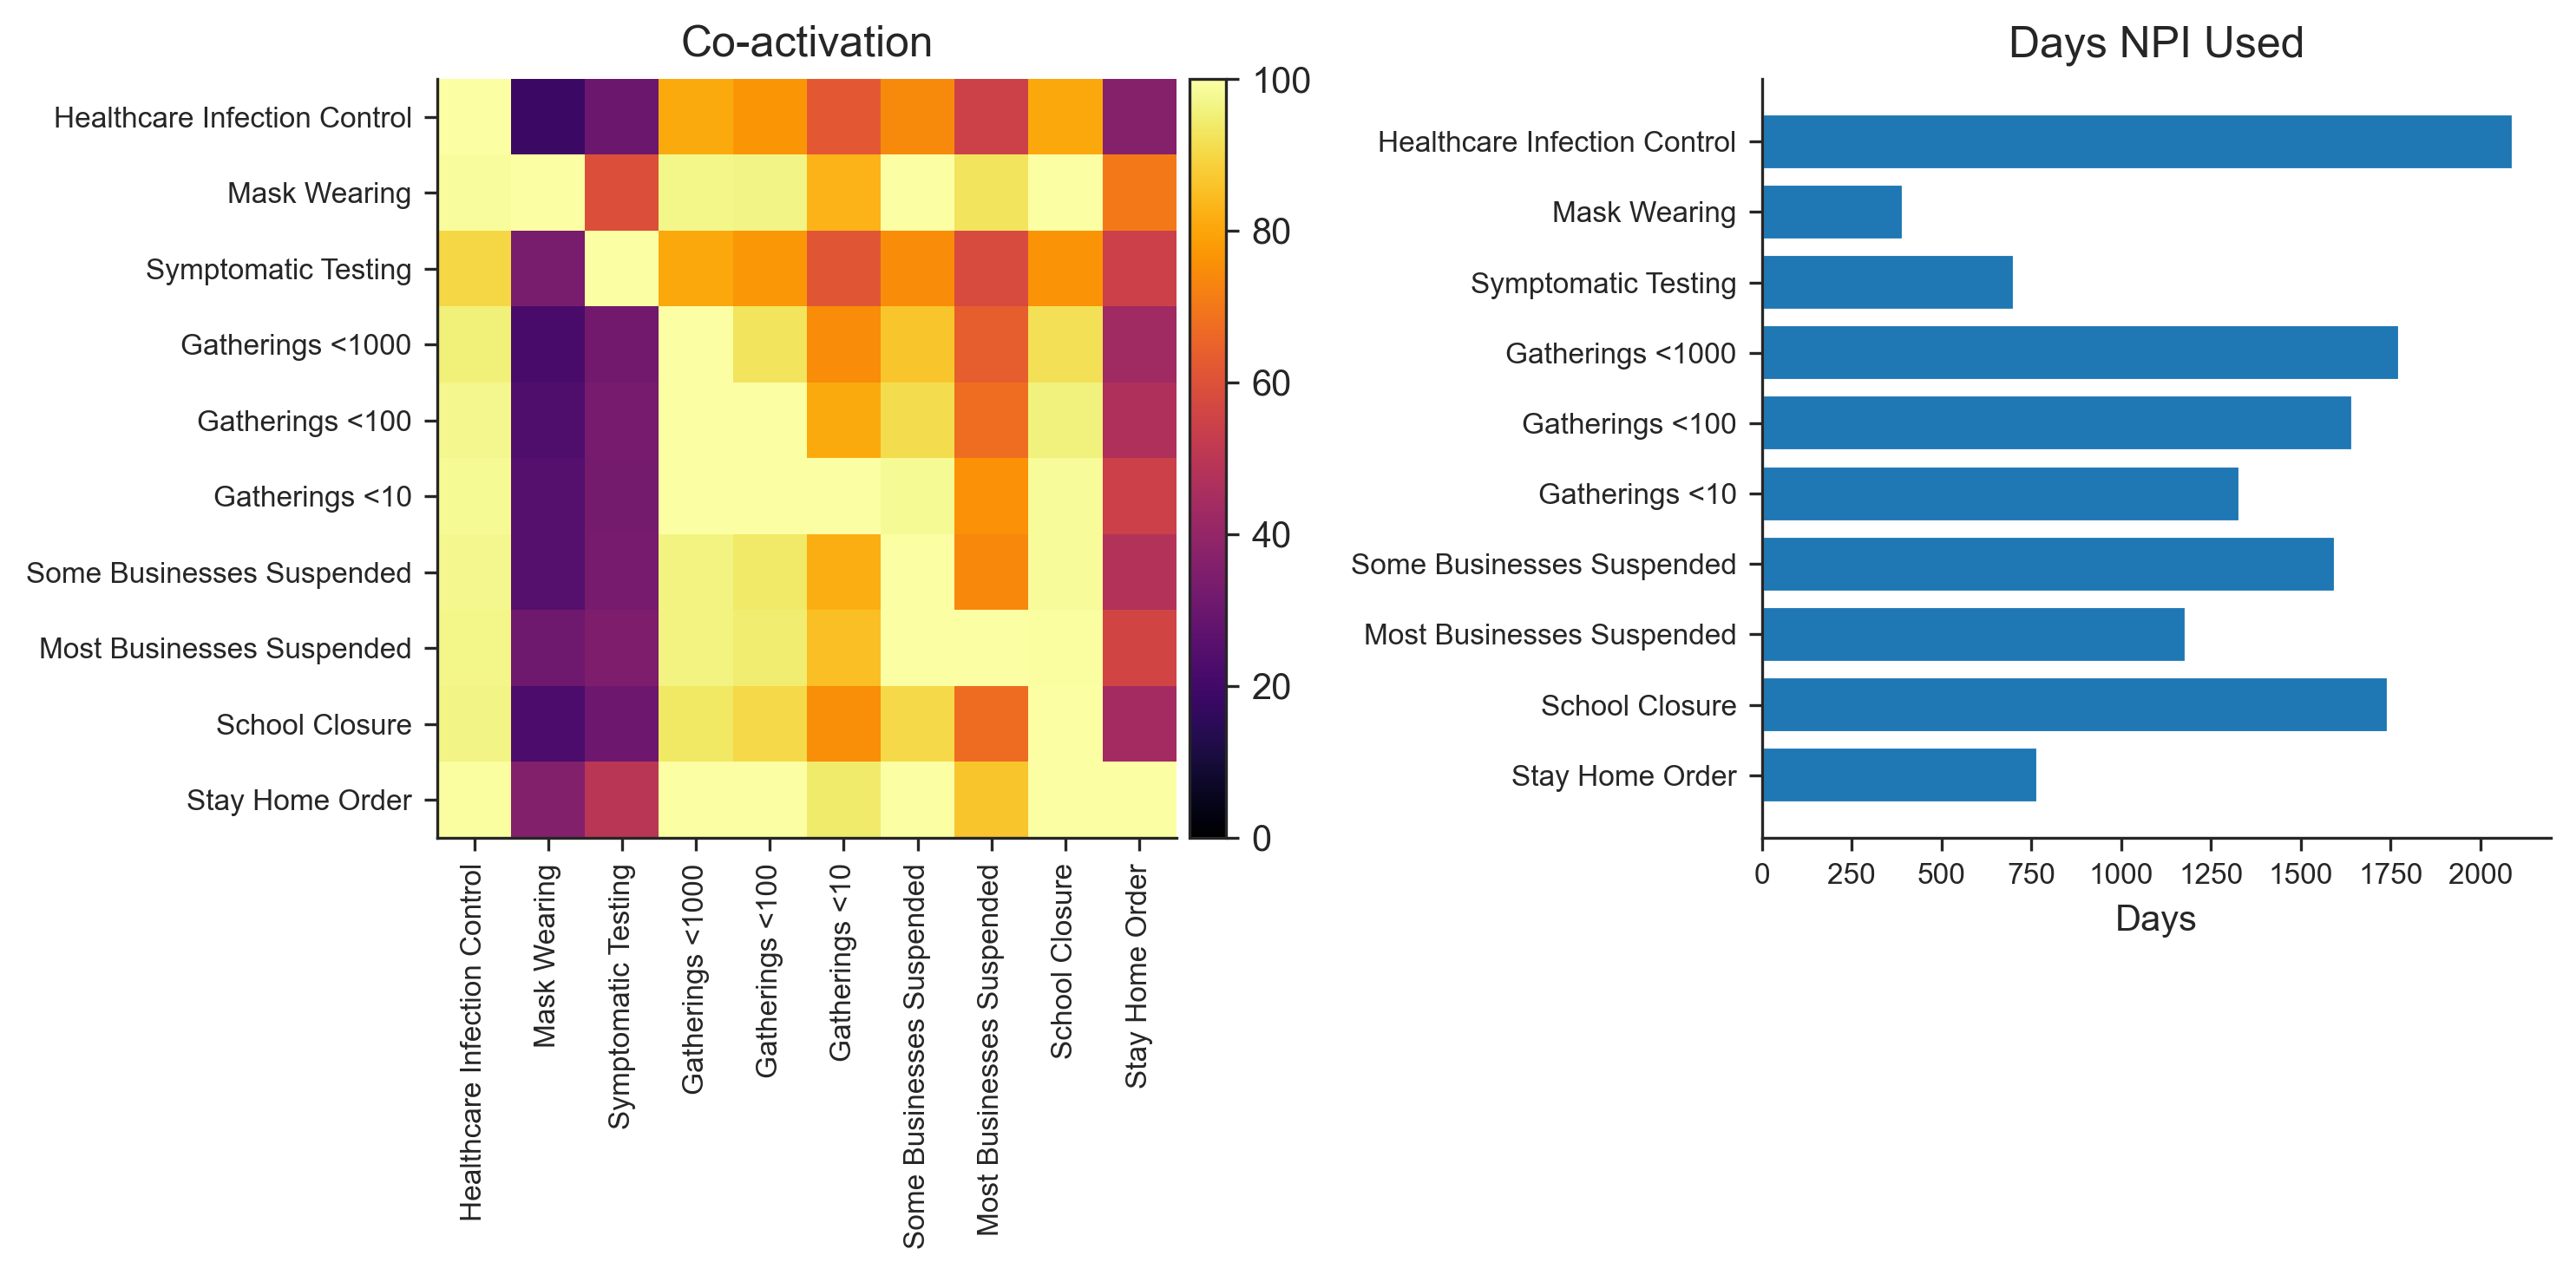

In [9]:
dp = DataPreprocessor()
data = dp.preprocess_data("../final_data/data_final.csv")

In [5]:
priors = ['default','wide'] 

In [8]:
models = []
for prior in priors:
    print(prior)
    with cm_effect.models.CMCombined_Final(data) as model:
        if prior=='default':
            model.build_model()
        if prior=='wide':
            model.build_model(cm_prior_sigma=10)
    model.run(2000)
    filename = 'out/cm_prior_' + str(prior) + '.txt'
    cm_trace = model.trace["CMReduction"]
    np.savetxt(filename, cm_trace)
    models.append(model)


default


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha                     6.90
RegionLogR                  28.31
GrowthCases               3810.02
GrowthDeaths              3810.02
InitialSizeCases_log      -160.50
InitialSizeDeaths_log     -160.50
ObservedCases           -89737.18
ObservedDeaths          -54053.40
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [37:15<00:00,  2.24draws/s] 
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


wide


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha                   -32.22
RegionLogR                  28.31
GrowthCases               3810.02
GrowthDeaths              3810.02
InitialSizeCases_log      -160.50
InitialSizeDeaths_log     -160.50
ObservedCases           -89737.18
ObservedDeaths          -54053.40
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [38:00<00:00,  2.19draws/s] 
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


### Plot traces 

In [ ]:
for model in models:
    model.plot_traces()

### Plot countermeasure effectiveness

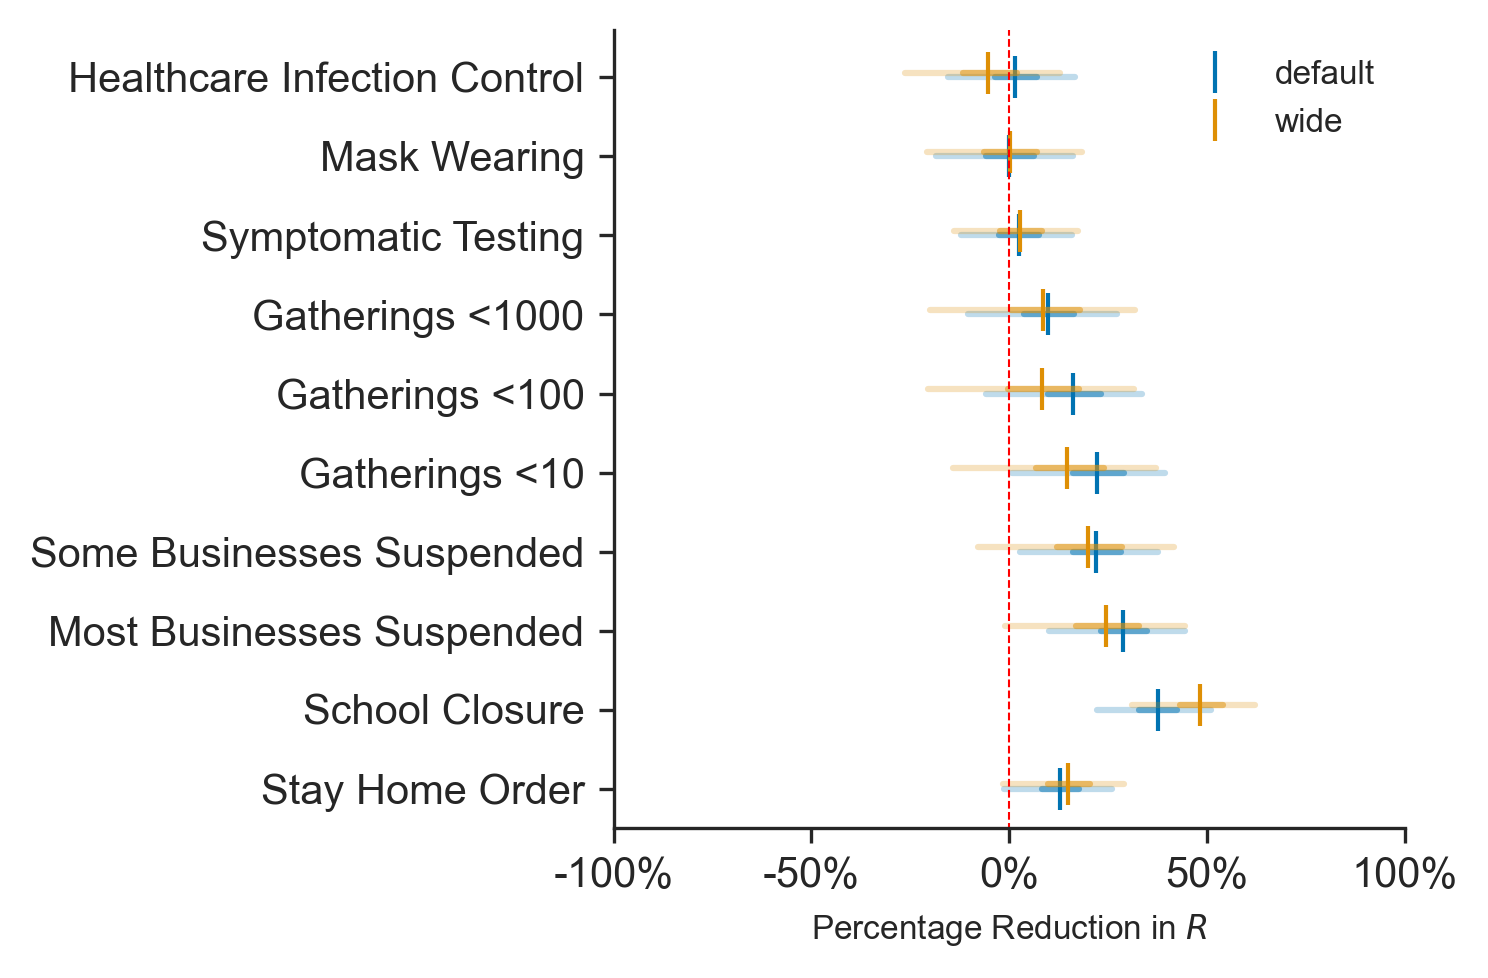

In [11]:
filenames = [f'out/cm_prior_{prior}.txt' for prior in priors]
cm_labels = data.CMs 
legend_labels = priors

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels)
plt.savefig('out/cm_prior_sensitivity.pdf')